# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
#Для начала нужно импортировать библиотеки, чтобы строить графики и читать файлы. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
#Прочитаем файл с данными
data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [3]:
#Откроем первые 5 строк датафрейма, чтобы изучить данные 
pd.set_option('display.max_columns', None)
print(display(data.head(5)))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


None


In [4]:
#Откроем последние 5 строк датафрейма, чтобы изучить данные 
print(display(data.tail(5)))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None


In [5]:
# Откроем общую информацию о таблице
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
#Проверим отклонения от нормы по столбцам 
print(display(data.describe()))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


None


- Проверить общую площадь квартиры в квадратных метрах (900 м²)
- Проверить жилую площадь квартиры в квадратных метрах (409 м²)
- Количество этажей 60 штук 
- Высота потолка в 1 метр или в 100 метров странно

In [7]:
#Проверим есть ли дубликаты в таблице
print(data.duplicated().sum())

0


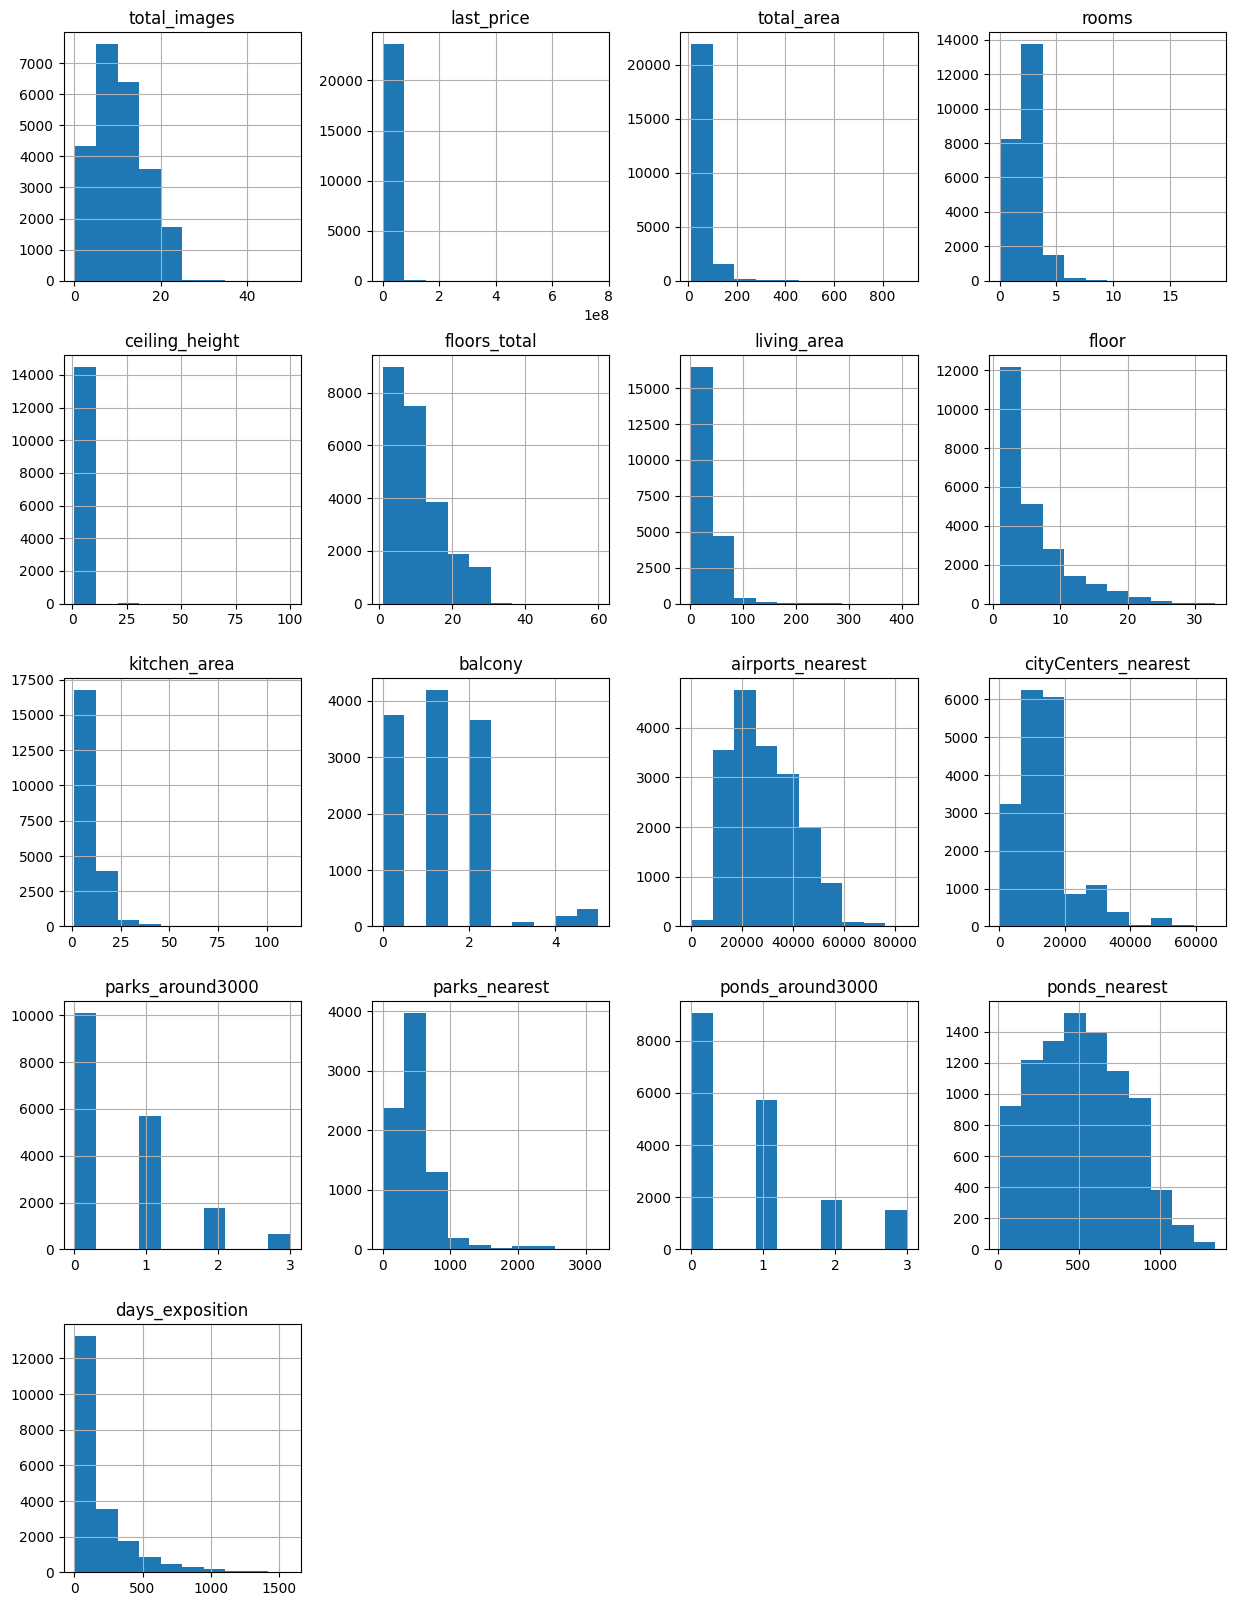

In [9]:
#Построим гистограмму всех числовых значений.   
ax = data.hist(figsize=(15, 20))

**Иследование данных по таблице:**
В таблице имеется 23699 строк данных по недвижиности в Санкт-Петербурге в которых есть пропущенные значения,  отклонения от нормы,некорректный тип для данных и время в нечитаемом формате.
Внимание привлекли данные: 
- Общая площадь квартиры в квадратных метрах (900 м²)
- Жилая площадь квартиры в квадратных метрах (409 м²)
- Высота потолка в 1 метр или в 100 метров странно

### Выполните предобработку данных

**2.1. Пропущенные значения** 

In [10]:
#Определяем в каких столбцах есть пропущенные значения 
print(data.isna().sum().sort_values())

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64


In [11]:
# Посмотрим теперь в процентах
# Пропуски выглядят некритично, люди могут не знать метры до объектов или им может быть лениво заполнять высоту потолков
data.isnull().sum().sort_values()/data.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

В 14 столбцах пропущены значения. Одиноковое число пропусков у 'ponds_around3000' (количество водоемов) и 
'parks_around3000' (количество парков) = 5518.

**2.1.1 Балконы**

In [12]:
display(data['balcony'].value_counts())
data['balcony'] = data['balcony'].fillna(0)

data['balcony'] = data['balcony'].astype('int')

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Заменили пропущенные значения на ноль.

**2.1.2 Высота потолка**

In [13]:
#Высота потолка.Проверяем уникальные значения.
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

In [14]:
#удаляем подозрительные значения и считаем медиану 
data = data.query('ceiling_height != [1.2, 1.75, 1, 100]')
median_ceiling = data['ceiling_height'].median()
print(median_ceiling)

2.65


In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling)

Если продавец не указал высоту потолка, скорее всего он не знает. Логично взять медиану по всем квартирам в Санкт-Петербурге, но стоит учесть аномальные значение, которые мы видели в первом шаге. (Высота потолка 1 метр)

**2.1.3 Расстояние до ближайшего аэропорта**

[18863. 12817. 21741. ... 11751. 20151. 24665.]


21085    0.0
Name: airports_nearest, dtype: float64

None


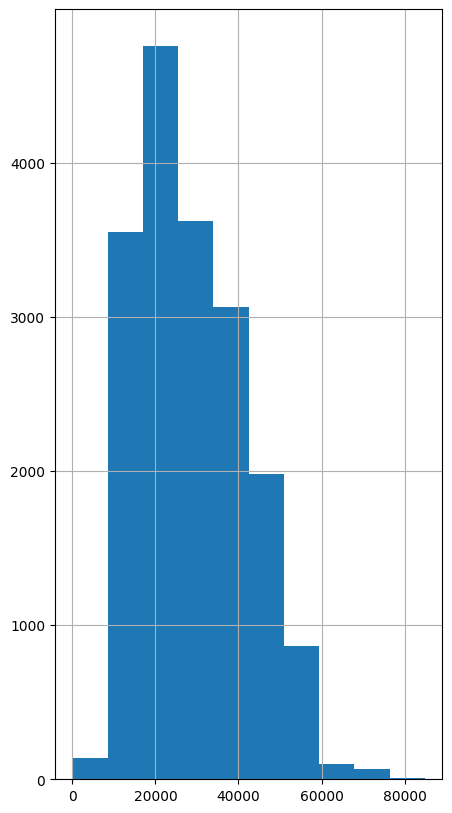

In [16]:
#Расстояние до ближайшего аэропорта. Проверяем уникальные значения.
print(data['airports_nearest'].unique())

#Смущает на гисторграмме по аэропортам значения около 0 (возможно указали не в метрах)
data['airports_nearest'].hist(figsize=(5, 10))

#Найдем значения менее 500 метров 
data_air = data.loc[data['airports_nearest'] < 500]
print(display(data_air['airports_nearest'].head(10)))

В строке 21085 имеется пропущенное или потерянное значение.  равное нулю. Она не записано как NaN -  странно. Люди не могут продовать квартиру  в 0 м от аэропорта.

In [17]:
#Сгрупируем таблицу по каждому городу и найдем медиану
data_air = data.pivot_table(index='locality_name', values = 'airports_nearest', aggfunc = 'median')
print(display(data_air.head(20)))

,airports_nearest
locality_name,
Зеленогорск,72282.0
Колпино,26232.0
Красное Село,25715.5
Кронштадт,67850.0
Ломоносов,48415.5
Павловск,20529.5
Петергоф,39231.0
Пушкин,15766.0
Санкт-Петербург,26757.0


None


In [18]:
# Количество пропусков расстояния до аэропорта
print('Количество пропусков:', data['airports_nearest'].isna().sum())
print('Доля пропущенных значений:',data['airports_nearest'].isna().sum()/ data['airports_nearest'].shape[0]*100)

Количество пропусков: 5541
Доля пропущенных значений: 23.384680312302173


Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных. 


*Но можно было создать цикл проходящий по всем пропускам в data (data['airports_nearest'].isna()) и заменял их значения. Тело цикла: Если  data_air['location_name'] == data['location_name'], то  в пропущеное значении столбца data['airports_nearest'] вставлялось значение data_air['airports_nearest']. Но я немного туплю и не получается это сделать*

In [19]:
median_airports = data['airports_nearest'].median()
print(median_airports)
#data['airports_nearest'] = data['airports_nearest'].fillna(median_airports)

26726.0


Заменять пропуски на общее медианное значение точно нельзя, так как разброс значений очень велик. На данном этапе оставим пропуски как есть.

**2.1.3 Расстояние до центра города** 

In [20]:
#Расстояние до центра города. Проверяем уникальные значения.
print(data['cityCenters_nearest'].unique())

#Сгрупируем таблицу по каждому городу и найдем медиану
data_city = data.pivot_table(index='locality_name', values = 'cityCenters_nearest', aggfunc = 'median')
print(display(data_city.head(20)))

#Если продавец не указал расстояние, скорее всего он не знает. Так же как и в предыдущем примере, неплохо бы сделать цикл.
median_cityCenters_nearest = data['cityCenters_nearest'].median()
print(median_cityCenters_nearest)
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(median_cityCenters_nearest)

# Количество пропусков расстояния до центра
print('Количество пропусков:', data['cityCenters_nearest'].isna().sum())
print('Доля пропущенных значений:',data['cityCenters_nearest'].isna().sum()/ data['cityCenters_nearest'].shape[0]*100)


[16028. 18603. 13933. ... 27977.  7262.  6263.]


,cityCenters_nearest
locality_name,
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29140.5
Кронштадт,49575.0
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5
Санкт-Петербург,12244.0


None
13098.0
Количество пропусков: 5518
Доля пропущенных значений: 23.28761342055286


Пропусков в данном столбце достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных. Данные оставляем без изменения.


*Но можно было создать цикл проходящий по всем пропускам в data (data['cityCenters_nearest'].isna()) и заменял их значения, как в заметке выше.* 

**2.1.4 Количество этажей в доме**

In [21]:
#Количество этажей в доме. Проверяем уникальные значения.
print(data['floors_total'].unique())

# Количество пропусков расстояния до центра
print('Количество пропусков:', data['floors_total'].isna().sum())
print('Доля пропущенных значений:',data['floors_total'].isna().sum()/ data['floors_total'].shape[0]*100)

#Если продавец не указал этаж, скорее всего он пропустил или данные потерялись.
median_floors_total = data['floors_total'].median()
print(median_floors_total)
data['floors_total'] = data['floors_total'].fillna(median_floors_total)

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.]
Количество пропусков: 86
Доля пропущенных значений: 0.36294576914960963
9.0


Пропусков в данном столбце не так много и количество этажей в доме не влияют на стоимость квартиры. Мы можем заполнить данные медианным значением. анные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу.

Сразу поняем тип данных из float в intenger для целочисленного счета этажей.

In [22]:
#Меняем тип данных на вещественный.
data['floors_total'] = data['floors_total'].astype('int64')

**2.1.5 Число парков** 

In [23]:
#Посмотрю в скольких строках пропущены значения количество парков 
print('Количество пропущенных значений парков:', data['parks_around3000'].isna().sum())
print('Доля пропущенных значений парков:',data['parks_around3000'].isna().sum()/ data['parks_around3000'].shape[0]*100)
#Посмотрю в скольких строках пропущены значения расстояния до парка 
print('Количество пропущенных значений расстояния до парка:', data['parks_nearest'].isna().sum())
print('Доля пропущенных значений расстояния до парка:',data['parks_nearest'].isna().sum()/ data['parks_nearest'].shape[0]*100)

Количество пропущенных значений парков: 5517
Доля пропущенных значений парков: 23.283393120911587
Количество пропущенных значений расстояния до парка: 15618
Доля пропущенных значений расстояния до парка: 65.91263979742563


In [24]:
#Найдем срез, где пропущены значения о количестве парков и в расстоянии
display(data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna())].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5,30.00,5,NaN,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,NaN,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9,NaN,2,NaN,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5,NaN,1,NaN,False,False,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18,16.30,9,NaN,False,False,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.65,4,42.50,3,NaN,False,False,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.65,12,NaN,8,NaN,False,False,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9,48.80,5,NaN,False,False,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Обнаружено интересное наблюдение, что в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пропущены значения почти в одних и тех же строках.

In [25]:
#Найдем срез, где пропущены значения во всех столбцах одновременно
print(len(data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna()) & (data['airports_nearest'].isna()) & (data['cityCenters_nearest'].isna()) & (data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna())]))

5517


Пропусков в данных столбцах достаточно много (порядка 23% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить по геопозиции районов или при обращении к владельцам данных. Данные оставляем без изменения.
Но можно было бы их отнести к определенной группе, чтобы потом не путать заполненые объявления.

In [26]:
#Количество парков. 
print(data['parks_around3000'].value_counts())

#Если продавец не указал количество парков, скорее всего рядом у него нет парков
data['parks_around3000'] = data['parks_around3000'].fillna(0)

0.0    10105
1.0     5680
2.0     1746
3.0      647
Name: parks_around3000, dtype: int64


In [27]:
#Меняем тип данных на вещественный.
data['parks_around3000'] = data['parks_around3000'].astype('int64')

**2.1.6 Число водоемов** 

In [28]:
#Число водоёмов. Проверяем уникальные значения.
print(data['ponds_around3000'].value_counts())

#Если продавец не указал количество водоемов, скорее всего у него нет рядом водоёмов.
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

0.0    9071
1.0    5717
2.0    1891
3.0    1499
Name: ponds_around3000, dtype: int64


In [29]:
#Меняем тип данных на вещественный.
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

**2.1.7 Апартаменты**

In [30]:
#Посмотрю в скольких строках пропущены значения 
print('Количество пропущенных значений апартаменты:', data['is_apartment'].isna().sum())
print('Доля пропущенных значений апартаменты:',data['is_apartment'].isna().sum()/ data['is_apartment'].shape[0]*100)

#Если продавец не указал апартаменты, скорее всего у него не апартаменты.
data['is_apartment'] = data['is_apartment'].fillna(0)

#Меняем тип данных на булевый.
data['is_apartment'] = data['is_apartment'].astype('bool')

Количество пропущенных значений апартаменты: 20921
Доля пропущенных значений апартаменты: 88.29288879510445


В данном столбце очень много пропущенных данных. Возможно, данные не были заполнены изначально или были утеряны в результате сбоя системы при загрузке/выгрузке базы данных. В дальнейшем исследовании нам не понадобится информация в этом столбце. Пропуски можно оставить как есть.
Тип данных в столбце is_apartment object, хотя переменная принимает только значения True и False. На булев тип данных также указывает описание таблицы. Произведем преобразование типа данных из object в bool

**2.1.8 Площадь кухни**

906      2.00
6262     2.00
7950     2.89
8729     2.40
9138     2.00
11033    2.00
16367    2.00
17834    2.30
19642    2.00
20217    1.30
Name: kitchen_area, dtype: float64

None
Количество пропущенных значений : 2278
Доля пропущенных значений : 9.61384258282338


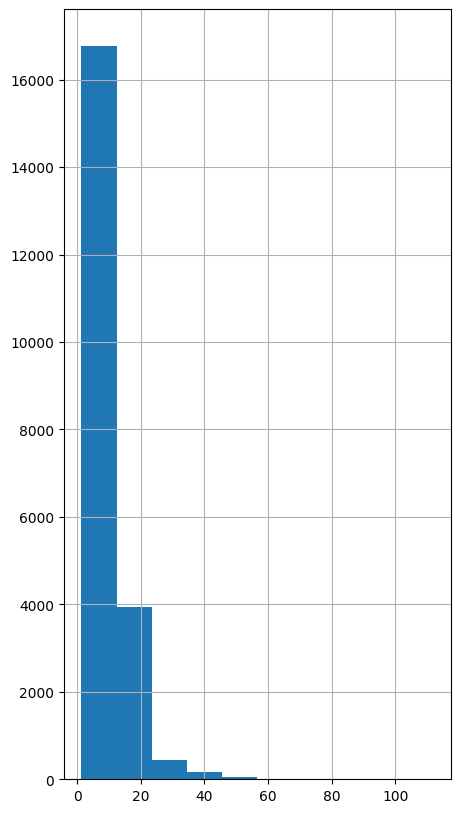

In [31]:
#Смущает на гисторграмме по площади кухни значения около 0 (возможно указали не в метрах квадратных)
data['kitchen_area'].hist(figsize=(5, 10), bins = 10)

#Найдем значения менее 3 метров квадратных
data_kit = data.loc[data['kitchen_area'] < 3]
print(display(data_kit['kitchen_area'].head(10)))


#Посмотрю в скольких строках пропущены значения площадь кухни
print('Количество пропущенных значений :', data['kitchen_area'].isna().sum())
print('Доля пропущенных значений :',data['kitchen_area'].isna().sum()/ data['kitchen_area'].shape[0]*100)

Пропусков в данном столбце не так много (порядка 9% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для деревень).
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Информацию можно восстановить  при обращении к владельцам данных. Данные оставляем без изменения.Но их так же можно отнести к другой категории данных.

**2.1.8 Название населенного пункта**

In [32]:
#Посмотрю в скольких строках пропущены значения площадь кухни
print('Количество пропущенных значений :', data['locality_name'].isna().sum())
print('Доля пропущенных значений :',data['locality_name'].isna().sum()/ data['locality_name'].shape[0]*100)

#Если продавец не указал название, скорее всего у данные точно потерялись. Укажем Неизвестно.
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

#print(display(data.loc[data['locality_name'] == 'Неизвестно']))

Количество пропущенных значений : 49
Доля пропущенных значений : 0.206794682422452


**2.1.9 Дней размещено объявление**

In [33]:
#Посмотрю в скольких строках пропущены значения 
print('Количество пропущенных значений :', data['days_exposition'].isna().sum())
print('Доля пропущенных значений :', data['days_exposition'].isna().sum()/ data['days_exposition'].shape[0]*100)

#Меняем тип данных на вещественный.
#data['days_exposition'] = data['days_exposition'].astype('int')

Количество пропущенных значений : 3181
Доля пропущенных значений : 13.424773158894283


Пропусков в данном столбце достаточно много (порядка 13% от общего числа данных). Строки с пропущенными значениями нельзя отнести к одной конкретной категории (разные даты заявлений, разные цены и расположения квартир и тд.).
Данные могли быть утеряны в результате сбоя системы при выгрузке базы.
Также возможно информация не была внесена системой, так как объявление не было снято в момент выгрузки данных.
Информацию можно восстановить при обращении к владельцам данных.
На данном этапе предположим, что объявления с пропусками не были сняты и оставим их как есть.


In [34]:
print(data.isna().sum().sort_values())

total_images                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area              1903
kitchen_area             2278
days_exposition          3181
cityCenters_nearest      5518
airports_nearest         5541
ponds_nearest           14588
parks_nearest           15618
dtype: int64


**2.2. Рассмотрение типов данных в каждом столбце** 

In [35]:
#Запросим данные, чтобы проверить тип 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23695 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23695 non-null  int64  
 1   last_price            23695 non-null  float64
 2   total_area            23695 non-null  float64
 3   first_day_exposition  23695 non-null  object 
 4   rooms                 23695 non-null  int64  
 5   ceiling_height        23695 non-null  float64
 6   floors_total          23695 non-null  int64  
 7   living_area           21792 non-null  float64
 8   floor                 23695 non-null  int64  
 9   is_apartment          23695 non-null  bool   
 10  studio                23695 non-null  bool   
 11  open_plan             23695 non-null  bool   
 12  kitchen_area          21417 non-null  float64
 13  balcony               23695 non-null  int32  
 14  locality_name         23695 non-null  object 
 15  airports_nearest   

Во втором шаге при заполнении пропущенных значений я изменила тип данных в соответствии с описание таблицы и смыслом хранимой информации:
- is_apartment  изменен с object в булевой тип (Булевой тип выводит True, если это апартаменты и False в ином случае) 
- balcony изменен с float64 на int64 (Количество балконов - вещественное число)
- floors_total  изменен с float64 на int64 (Количество этажей - вещественное число)

При изменении 'days_exposition' (Количество дней) в тип int64, выдает ошибку, так как есть пропуски, которые я не могу заполнить.
#data['days_exposition'] = data['days_exposition'].astype('int')


*first_day_exposition  23695 non-null  object*
Данные представляют собой дату публикации объявления. Преобразуем тип данных из object в datetime с помощью метода to_datetime.
first_day_exposition  23695 non-null  object 

In [36]:
# формат даты передадим методу to_datetime с помощью параметра format.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [37]:
#Запросим данные, чтобы проверить тип 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23695 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23695 non-null  int64         
 1   last_price            23695 non-null  float64       
 2   total_area            23695 non-null  float64       
 3   first_day_exposition  23695 non-null  datetime64[ns]
 4   rooms                 23695 non-null  int64         
 5   ceiling_height        23695 non-null  float64       
 6   floors_total          23695 non-null  int64         
 7   living_area           21792 non-null  float64       
 8   floor                 23695 non-null  int64         
 9   is_apartment          23695 non-null  bool          
 10  studio                23695 non-null  bool          
 11  open_plan             23695 non-null  bool          
 12  kitchen_area          21417 non-null  float64       
 13  balcony         

**2.3. Изучение уникальных значений** 

In [38]:
#Напишем цикл,который будет проходить через срез столбца с уникальными значениями
for i in data.loc[data['locality_name'].notna(), 'locality_name'].unique():
    data['locality_name'].replace({i: i.replace('поселок', 'посёлок')}, inplace=True)
    data['locality_name'].replace({i: i.replace('городской посёлок', 'посёлок городского типа')}, inplace=True)
    
display(data['locality_name'].unique())    


array(['Санкт-Петербург', 'посёлок Шушары',
       'посёлок городского типа Янино-1', 'посёлок Парголово',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёл

# Выводы : #
1. Данные в таблице содержат большое колличество пропусков (до 65% в столбце).
2. Пропуски были проанализированы и по возможности заполнены (например пропущенные значения в колличестве балконов заменены на 0).
3. Возможные причины пропусков приведены для каждой переменной. Основными причинами являются отсутствие информации при заполнении объявления и сбои в работе системы при загрузке/выгрузке базы данных.
4. Типы данных были преобразованы в соответствии с описанием таблицы и смыслом хранимой информации.
5. Столбец с неявными дубликатами приведен к единому виду по населенным пунктам.

### Добавьте в таблицу новые столбцы

**3.1. Цена одного квадратного метра**

In [39]:
#нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой
data['price_meter'] = data['last_price']/data['total_area']

**3.2. День недели публикации**

In [40]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее
data['weekday'] = data['first_day_exposition'].dt.weekday

**3.3. Месяц публикации и год**

In [41]:
#месяц  и год публикации объявления
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

**3.4. Тип этажа квартиры**

In [42]:
print(data['floor'].unique())

#решение через функцию 
def floor(row):
    if  row['floor'] == 1:
        result = 'первый'
    elif row['floor'] == row['floors_total']:
        result = 'последний'
    else:
        result = 'другой'
        
    return result

#Создаем столбецб который с помощью метода apply воспроизведет функцию для каждой строки 
data['floor_type'] = data.apply(floor, axis=1)

#display(print(data['floor_type'].head(5)))

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


**3.5. Расстояние до центра города в километрах**

In [43]:
#переведите из м в км и округлите до ближайших целых значений
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000) 

### Проведите исследовательский анализ данных

**4.1 Изучение параметров**

**4.1.1 Изучение параметра: общая площадь**

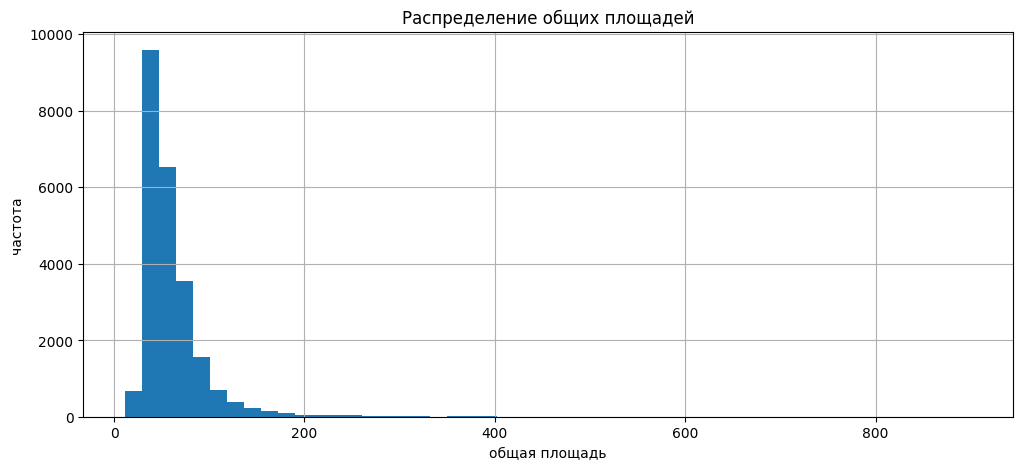

In [44]:
#Построим гистограмму для просмотра редких значений
fig, ax = plt.subplots(figsize=(12, 5))
data['total_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение общих площадей', xlabel='общая площадь', ylabel='частота')
plt.show()

Данные о Площади квартир более 200 м2 снущают. Проверим наличие в них отклонений от цены.

In [45]:
print(display(data.loc[(data['total_area'] > 200) & (data['last_price']< data['last_price'].median())]))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type,cityCenters_km


None


При анализе данных общей площади не обнаружены отклонения и редкие значения. Проведена проверка значений более 200 м2 и цены менее медианного значения. Данные не обнаружены.

Доля значений свыше 200 м2: 0.9748892171344165


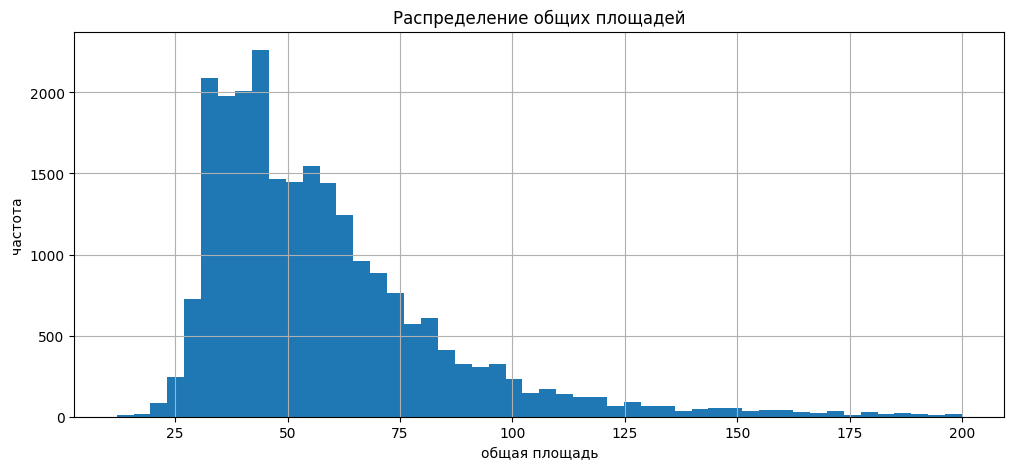

In [46]:
#Сосчитаем долю для удаление этих значений
print('Доля значений свыше 200 м2:',  (data['total_area'] >= 200).sum() / data.shape[0]*100)

#Для дальнейшеного анализа уберем значения выше 200 м2 так как они меньше 2 процентов 
data = data.query('total_area <= 200')

fig, ax = plt.subplots(figsize=(12, 5))
data['total_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение общих площадей', xlabel='общая площадь', ylabel='частота')
plt.show()

**4.1.2. Изучение параметра: жилая площадь**

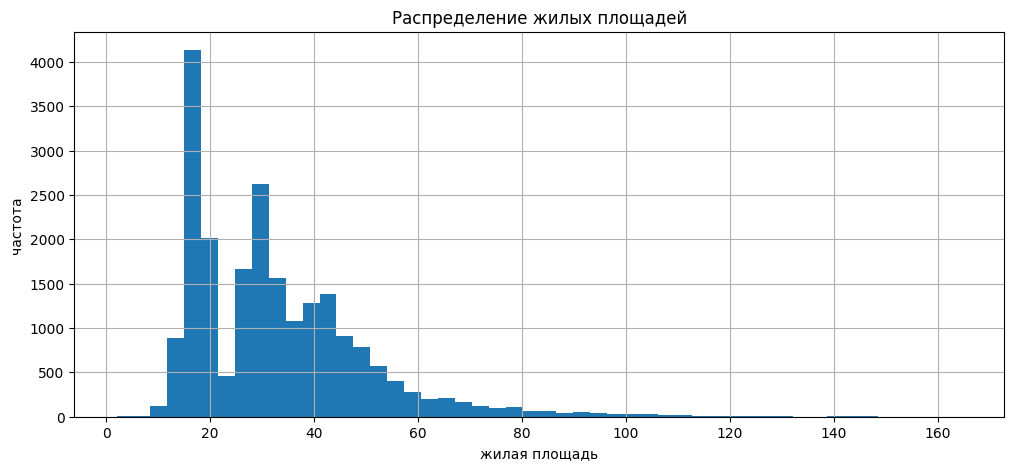

In [47]:
#Построим гистограмму для просмотра редких значений
fig, ax = plt.subplots(figsize=(12, 5))
data['living_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение жилых площадей', xlabel='жилая площадь', ylabel='частота')
plt.show()

На распределении видны 2 пика (30 м2 и 18 м2). Могу предположить, что это стандартная жилая площадь у однокомнатных и двухкомнатных квартир в Санкт-Петербурге. Так же интересно значение 22 м2.

In [48]:
#Проверим теорию, что пропуски, которые не заполнены и являются упадком в значении 22 м2
print(data['living_area'].median())

30.0


Теория не подтвердилась, но пик в 30 м2 является обослованным, так как это медианное значение.

In [49]:
#Проверим не равна ли жилая площадь общей площади и сколько таких значений 
print(display(data.loc[(data['living_area'] == data['total_area'])]))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type,cityCenters_km
9861,10,2350000.0,25.0,2017-12-03,0,2.65,22,25.0,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,13.0,94000.000000,6,12,2017,другой,NaN
12691,1,3700000.0,24.2,2017-11-10,0,2.65,19,24.2,13,False,False,True,NaN,1,Санкт-Петербург,17837.0,16840.0,0,NaN,2,210.0,74.0,152892.561983,4,11,2017,другой,17.0


None


Доля значений < 7 м2 и > 200 м2: 0.03408897221748764


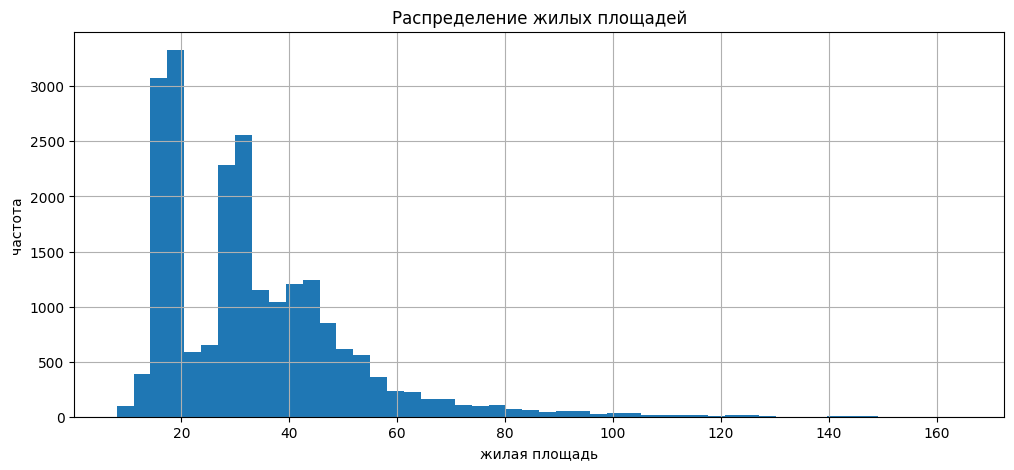

In [50]:
#Сосчитаем долю для удаление этих значений <7 м2 и >200 м2
print('Доля значений < 7 м2 и > 200 м2:', (( data['living_area'] >= 200).sum() / data.shape[0]*100) + ((data['living_area'] <= 7).sum() / data.shape[0]*100))

#Для дальнейшеного анализа уберем значения выше 200 м2  и меньше 7 м2, так как она ~ 3 процента 
data = data.query(' 7 <=living_area <= 200')

fig, ax = plt.subplots(figsize=(12, 5))
data['living_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение жилых площадей', xlabel='жилая площадь', ylabel='частота')
plt.show()

**4.1.3. Изучение параметра: площадь кухни**

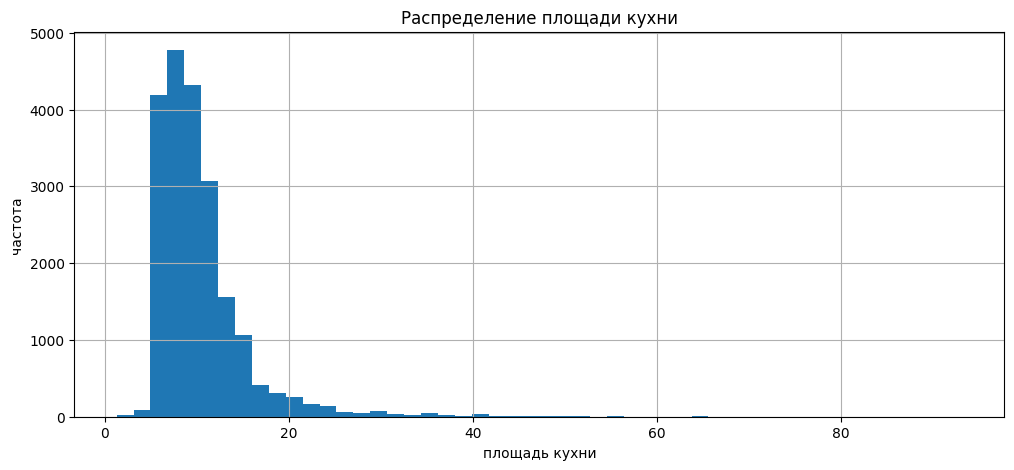

In [51]:
#Построим гистограмму для просмотра редких значений
fig, ax = plt.subplots(figsize=(12, 5))
data['kitchen_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение площади кухни', xlabel='площадь кухни', ylabel='частота')
plt.show()

Распределение Пуассона. Так же уберем все выбросы кухонь менее 5 м2 и более 60 м2, изучив долю данных.

Доля значений < 5 м2 и > 60 м2: 2.1820708825573316


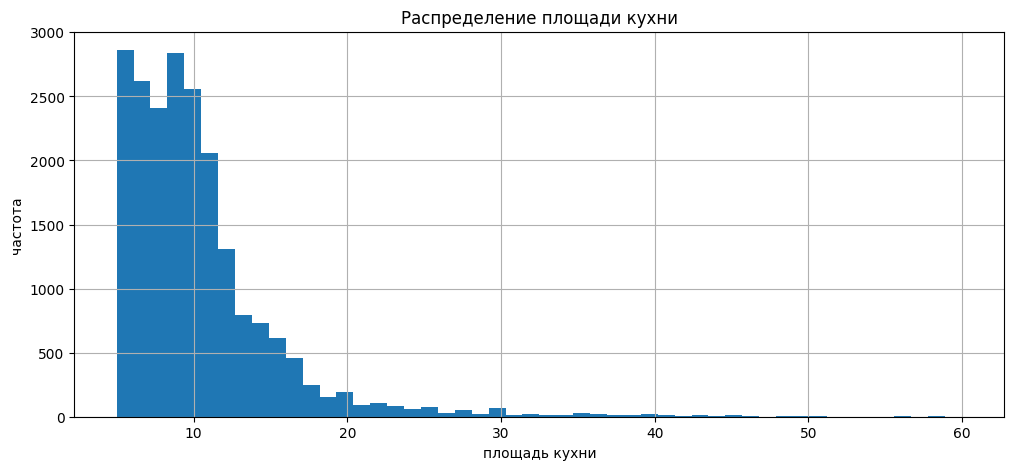

In [52]:
#Сосчитаем долю для удаление этих значений <5 м2 и > 60 м2
print('Доля значений < 5 м2 и > 60 м2:', (( data['kitchen_area'] >= 60).sum() / data.shape[0]*100) + ((data['kitchen_area'] <= 5).sum() / data.shape[0]*100))

#Для дальнейшеного анализа уберем значения выше 60 м2  и меньше 5 м2, так как она ~ 2 процента 
data = data.query(' 5 <=kitchen_area <= 60')


fig, ax = plt.subplots(figsize=(12, 5))
data['kitchen_area'].hist(bins=50, ax=ax)
ax.set(title='Распределение площади кухни', xlabel='площадь кухни', ylabel='частота')
plt.show()

**4.1.4. Изучение параметра: цена объекта**

In [53]:
data = data.query('last_price <= 2e7') 

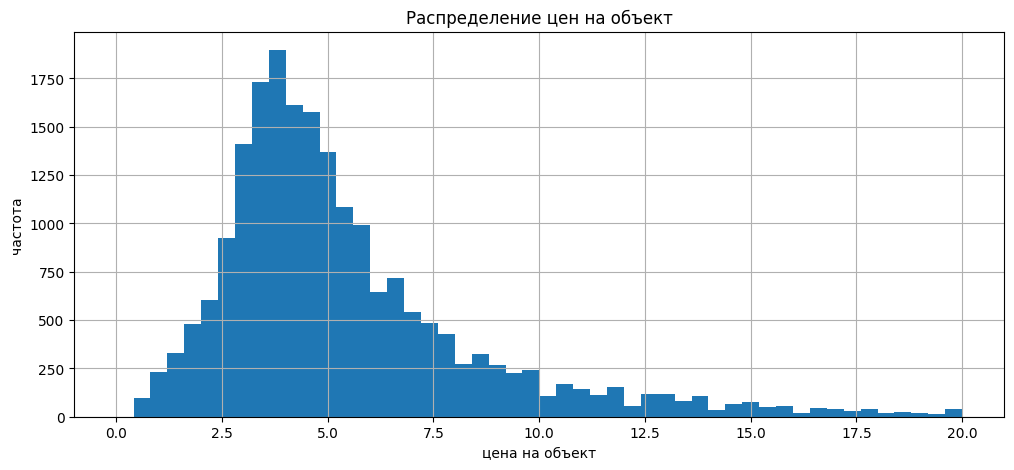

In [54]:
#Делим значения в столбце data['last_price'] на 1 млн.
data['last_price'] = data['last_price']/(10**6)
#Построим гистограмму для просмотра редких значений
fig, ax = plt.subplots(figsize=(12, 5))
data['last_price'].hist(bins=50, ax=ax)
ax.set(title='Распределение цен на объект', xlabel='цена на объект', ylabel='частота')
plt.show()

Распределение Пуасона 

**4.1.5. Изучение параметра: количество комнат**

In [55]:
print(data['rooms'].value_counts())
data = data.query('rooms <= 6') 

2     7018
1     7015
3     5051
4      903
5      187
6       47
7       12
11       1
8        1
Name: rooms, dtype: int64


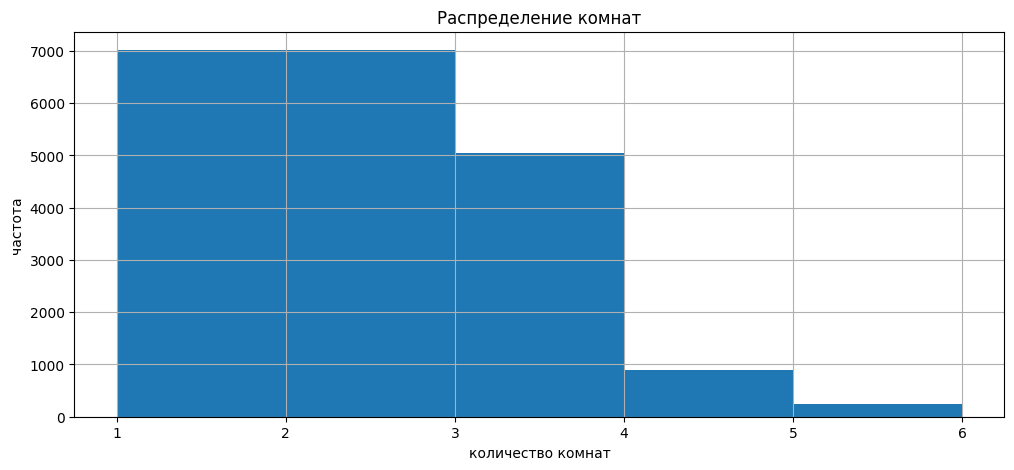

In [56]:
#Построим гистограмму для просмотра редких значений
fig, ax = plt.subplots(figsize=(12, 5))
data['rooms'].hist(bins=5, ax=ax)
ax.set(title='Распределение комнат', xlabel='количество комнат', ylabel='частота')
plt.show()

**4.1.6. Изучение параметра: высота потолков**

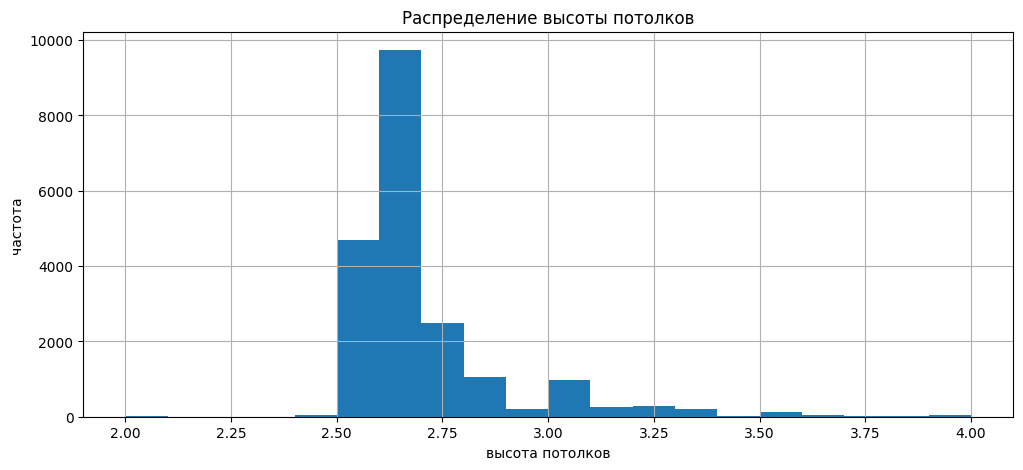

In [57]:
#По заданию берем данные из строк >= 20 из столбца с высотой и делим на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10
data = data.query('2 <= ceiling_height <= 4')

#В первом шаге мы заметили странные значения и удалили их (1.2, 1.75, 1, 100)
fig, ax = plt.subplots(figsize=(12, 5))
data['ceiling_height'].hist(bins=20, ax=ax)
ax.set(title='Распределение высоты потолков', xlabel='высота потолков', ylabel='частота')
plt.show()

**4.1.7. Изучение параметра: тип этажа квартиры**

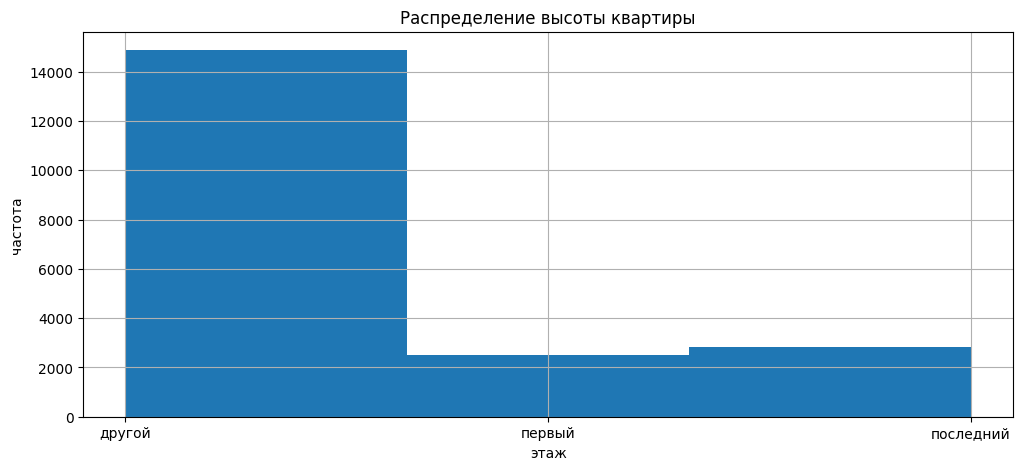

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))
data['floor_type'].hist(bins=3, ax=ax)
ax.set(title='Распределение высоты квартиры', xlabel='этаж', ylabel='частота')
plt.show()

**4.1.8. Изучение параметра: общее количество этажей в доме**

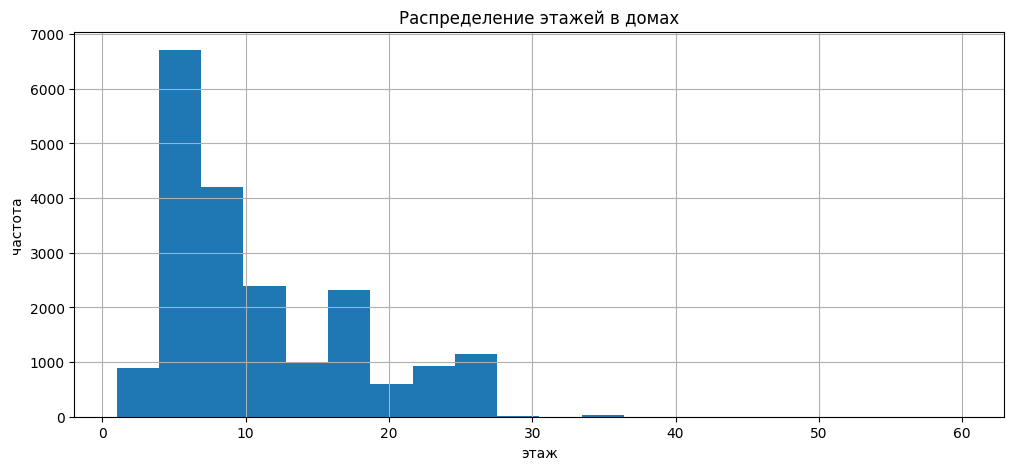

In [59]:
fig, ax = plt.subplots(figsize=(12, 5))
data['floors_total'].hist(bins=20, ax=ax)
ax.set(title='Распределение этажей в домах', xlabel='этаж', ylabel='частота')
plt.show()

Санкт-Петербург славится центром с малоэтажными домами. Логично, что пик именно на 5- этажных домах.

**4.1.9. Изучение параметра: расстояние до центра города в метрах**

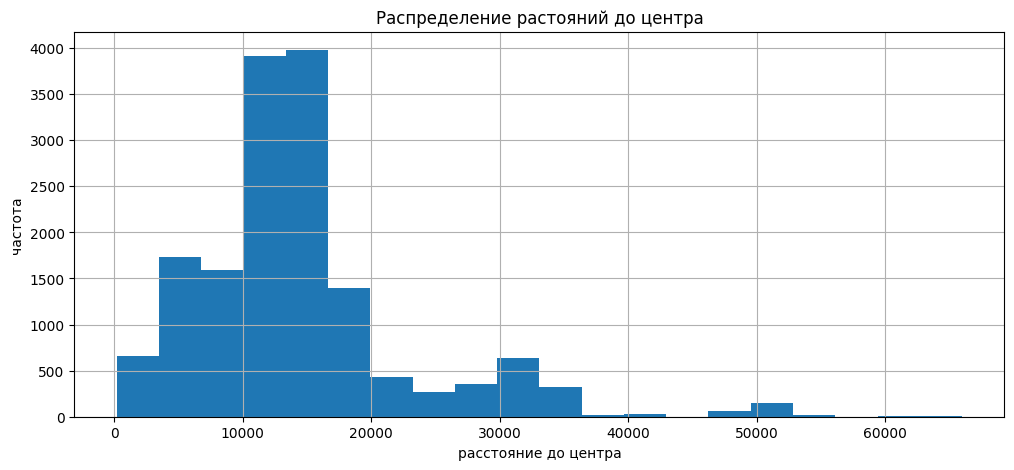

In [60]:
fig, ax = plt.subplots(figsize=(12, 5))
data['cityCenters_nearest'].hist(bins=20, ax=ax)
ax.set(title='Распределение растояний до центра', xlabel='расстояние до центра', ylabel='частота')
plt.show()

Значения, которые указаны свыше 40000 - скорее всего это населенные пункты у города Санкт-Петербург (Петергоф и другие).

**4.1.10. Изучение параметра: расстояние до ближайшего парка**

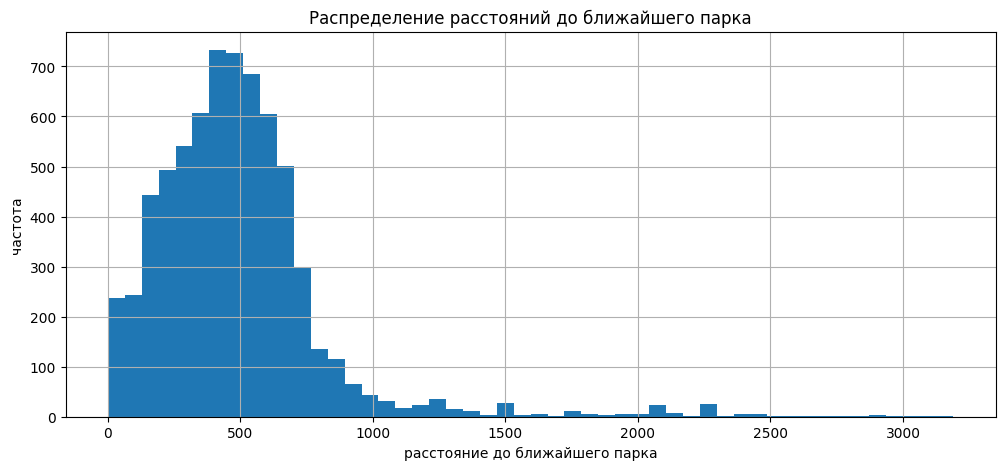

In [61]:
fig, ax = plt.subplots(figsize=(12, 5))
data['parks_nearest'].hist(bins=50, ax=ax)
ax.set(title='Распределение расстояний до ближайшего парка', xlabel='расстояние до ближайшего парка', ylabel='частота')
plt.show()
#Странно, что люди живут в 0 метрах от парка, но всё возможно 

**4.2 Анализ продажи квартир**

**4.2.1. Построить гистограмму**

99-й персентиль значений days_exposition: 1057.1
1-й персентиль значений days_exposition: 4.0


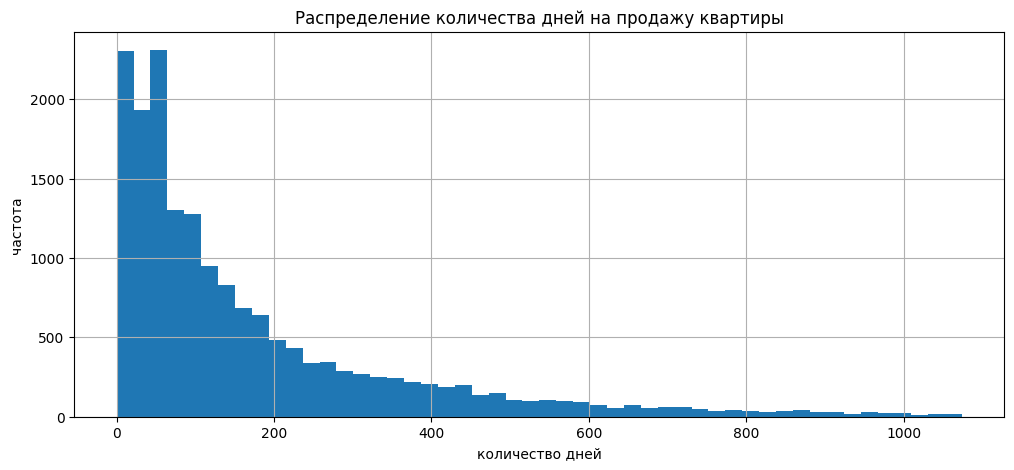

In [62]:
# найдём 1-й персентиль значений days_exposition с помощью метода .quantile(.99)
print('99-й персентиль значений days_exposition:', round(data['days_exposition'].quantile(0.99), 1))
# найдём 1-й персентиль значений days_exposition с помощью метода .quantile(.01)
print('1-й персентиль значений days_exposition:', round(data['days_exposition'].quantile(0.01), 1))

#Построим гистограмму
fig, ax = plt.subplots(figsize=(12, 5))
data['days_exposition'].hist(bins=50, range=(0, 1074.5))
ax.set(title='Распределение количества дней на продажу квартиры', xlabel='количество дней', ylabel='частота')
plt.show()

**4.2.2. Сосчитать медиану и среднее значение**

In [63]:
print('Медианное значение дней продажи квартир:', round(data['days_exposition'].median()))
print('Среднее значение дней продажи квартир:', round(data['days_exposition'].mean()))
display(data['days_exposition'].describe())

Медианное значение дней продажи квартир: 100
Среднее значение дней продажи квартир: 183


count    17496.000000
mean       182.681413
std        218.727372
min          1.000000
25%         44.000000
50%        100.000000
75%        235.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**


Продажа квартиры обычно занимает 98 дней. Продажи квартир за нескольких дней являются необычно быстрыми, в особенности от 1 до 42 дней. Необычно долгими продажами можно считать продажи от 232 дней и больше.

**4.3 Факторы, которые больше всего влияют на общую (полную) стоимость объекта**

In [64]:
#Подготовка данных, создаем сводные таблицы 
data_last_price = data.pivot_table(index = 'last_price', values =['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday','month','year'])
display(data_last_price.head(5))

C:\Users\Admin\AppData\Local\Temp\ipykernel_24940\1894234488.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data_last_price = data.pivot_table(index = 'last_price', values =['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday','month','year'])


,kitchen_area,living_area,month,rooms,total_area,weekday,year
last_price,,,,,,,
0.01219,40.50,32.000000,3.000000,2.000000,109.000000,2.000000,2019.000000
0.43000,6.00,16.000000,4.000000,1.000000,30.400000,0.000000,2019.000000
0.45000,6.60,23.533333,5.666667,1.666667,40.633333,2.333333,2017.666667
0.47000,8.25,30.000000,4.500000,1.500000,42.750000,3.000000,2018.000000
0.49000,5.50,17.000000,5.000000,1.000000,29.100000,3.000000,2016.000000


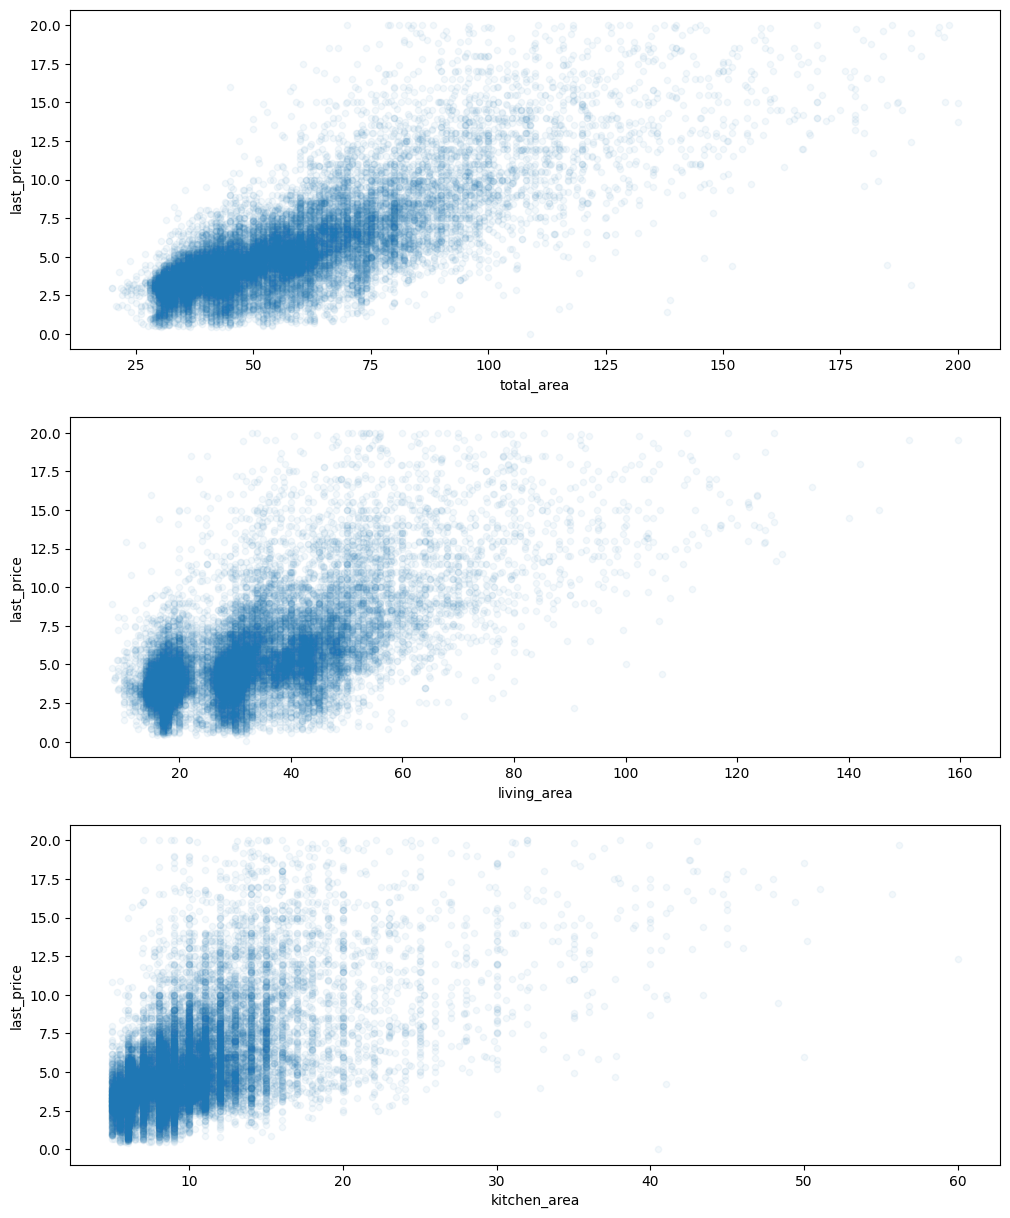

In [65]:
data_area =  data.pivot_table(index = 'last_price', values =['total_area', 'living_area', 'kitchen_area'])


#Очень хочу сделать функцию, которая будет принимать свобную таблицу, а возвращать графики, но додуматься не могу
#Подскажите, как она должна выглядеть 


fig, axes = plt.subplots(3, 1, figsize=(12, 15))
for area, ax in zip(['total_area', 'living_area', 'kitchen_area'], axes):
    data.plot(x=area, y='last_price', kind='scatter', alpha=.05, ax=ax)
plt.show()

#Почему когда я делаю другой тип (например hist) у меня они полностью одинаковые или вообще не выходят. Разобраться 

In [66]:
print(f'Корреляция между стоимостью квартиры и общей площадью составила {data["last_price"].corr(data["total_area"])}')
print(f'Корреляция между стоимостью квартиры и жилой площадью составила {data["last_price"].corr(data["living_area"])}')
print(f'Корреляция между стоимостью квартиры и площадью кухни составила {data["last_price"].corr(data["kitchen_area"])}')

Корреляция между стоимостью квартиры и общей площадью составила 0.7734875404215444
Корреляция между стоимостью квартиры и жилой площадью составила 0.6553570666487475
Корреляция между стоимостью квартиры и площадью кухни составила 0.5752586859385441


C:\Users\Admin\AppData\Local\Temp\ipykernel_24940\2508386531.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data_last =  data.pivot_table(index = 'last_price', values =['rooms', 'floor_type', 'weekday','month','year'])


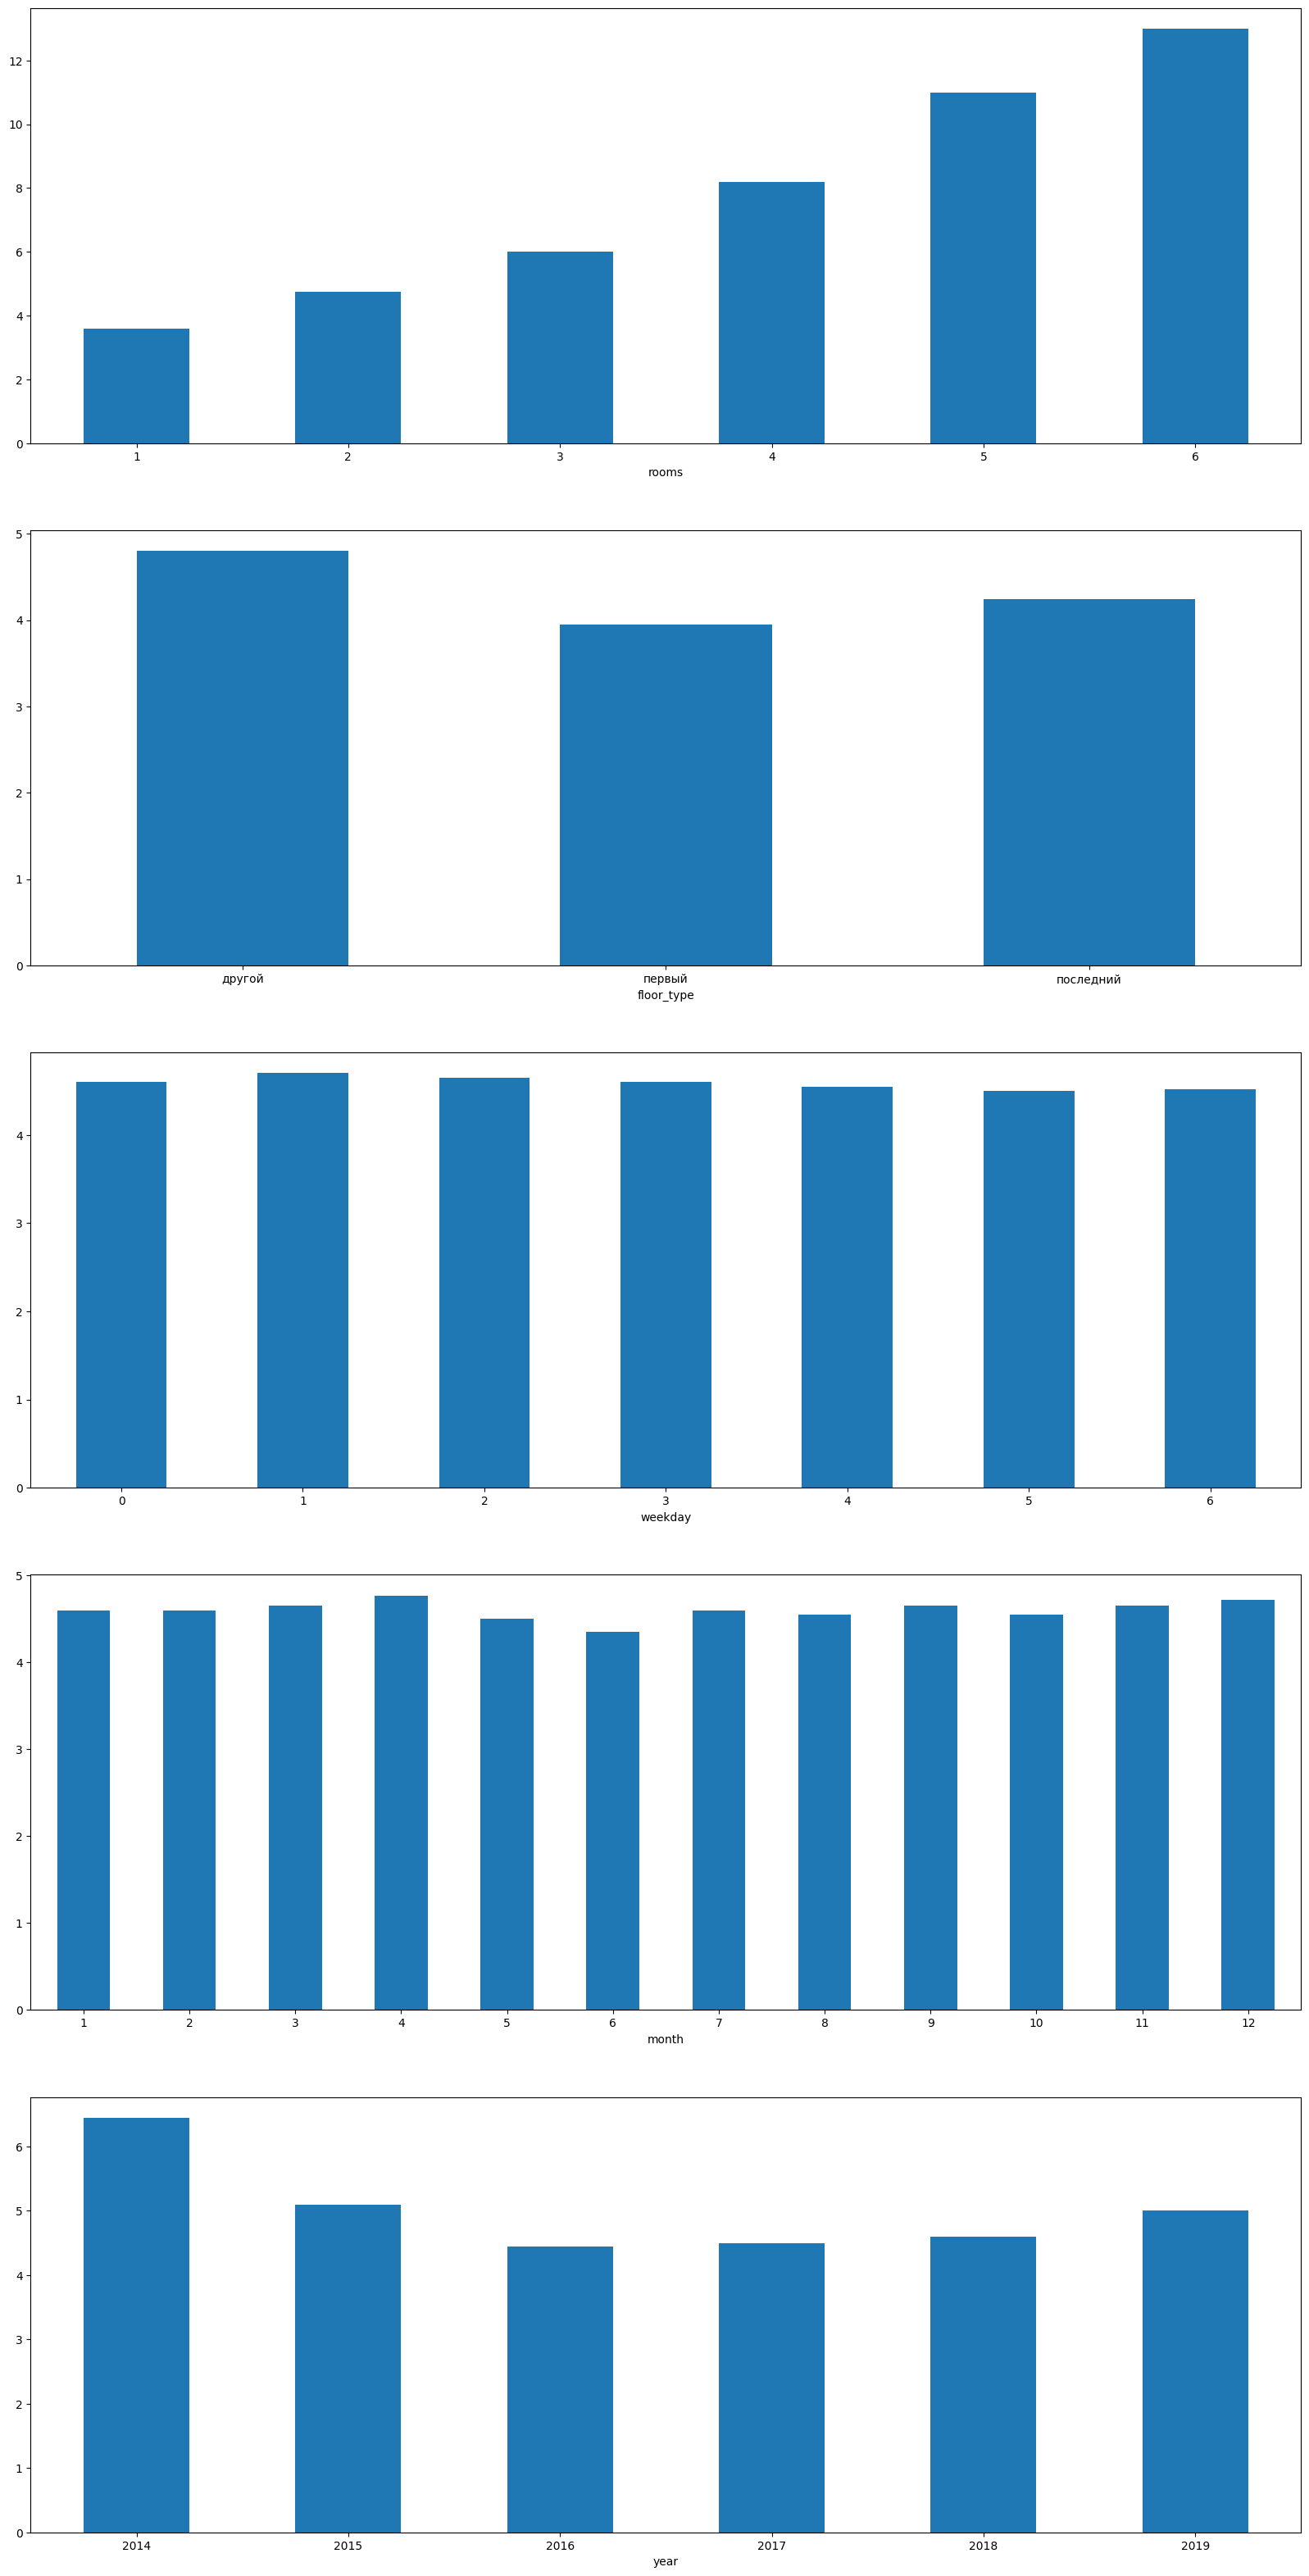

In [67]:
data_last =  data.pivot_table(index = 'last_price', values =['rooms', 'floor_type', 'weekday','month','year'])

fig, axes = plt.subplots(5, 1, figsize=(20, 40))
for feture, ax in zip(['rooms', 'floor_type', 'weekday', 'month', 'year'], axes):
    data.groupby(feture)['last_price'].median().plot(kind='bar', rot=0, ax=ax)
plt.show()
#Вычитала про zip, но так и не поняла почему не работает data['rooms', 'floor_type', 'weekday', 'month', 'year']- это же список из колонок
#Не покидает идея с сводными таблицами и функцией вывода графиков

По диаграмам мы выявили следующее:
- наибольшее количество объявлений выявлено в декабре месяце;
- в выходные дни кол-во объявлений ниже, чем в буднии дни;
- стоимость квартиры сильно коррелирует с жилой площадью;
- чем больше комнат в квартире, тем выше стоимость;
- с 2014 года количество объявлений значительно уменьшилось. После 2017 года количество объявлений о продаже квартир постепенно увеличивалось.

**4.4 Средняя цена одного квадратного метра в 10 населённых пунктах**

In [68]:
#Cоздаем сводную таблицу где индексы -названия, а выверка по цене за метр (считаем кол. для определения наиб)
meter_price = data.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'mean'])
meter_price.columns=['count', 'mean']
display(meter_price.sort_values(by = 'count', ascending = False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,13367,108095.288889
посёлок Мурино,426,85227.904565
посёлок Шушары,391,78350.719309
Всеволожск,355,67365.960713
Пушкин,322,102185.508260
Колпино,321,75129.845412
посёлок Парголово,288,90756.003417
Гатчина,285,68739.938639
деревня Кудрово,226,92248.477506


Самая высокая цены за объявления находяться в Санкт-Петербурге, а самые низкие в Кронштадте.

**4.5 Зависимость цены от расстояния от центра города в Санкт Петербурге**

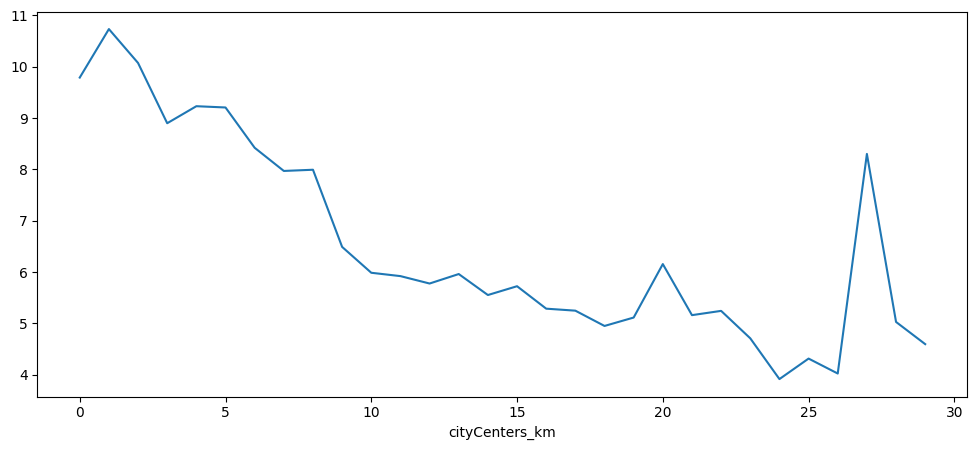

In [69]:
#Берем срез, где города = Санкт-Петербургу, и группируем по столбцу расстояние от центра по столбцу цена средняя
fig, ax = plt.subplots(figsize=(12, 5))
data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_km')['last_price'].mean().plot(ax=ax)
plt.show()


На диаграмме видно, что в среднем цены на квартиру около центра в Санкт-Петербурга гораздо выше, чем далеко от центра. Так же виен пик в радиусе 27-28 км от центра. Возможно это спальные районы.

### Общий вывод

В начале исследования мы изучили общие данные о продажах квартир в Санкт-Петербурге и ближайших городах. Нашли пропуски в 14 столбцах, заметили необычные значения (потолки низкие), изучили есть ли явные дубликаты и обнаружили некорректный тип данных в столбцах.

На втором этапе иследования мы заменили пропущенные значения по следующим столбцам :
- data ['floors_total'] - количество этажей в доме заменили на медианное значение.
- data['living_area'] -   жилая площадь оставили без изменений
- data['kitchen_area'] - площадь кухни оставили без изменений
- data['days_exposition'] -количество дней публикации оставили без изменений
- data ['ponds_around3000'] - количество водоёмов в радиусе 3 км заменили на 0 (Многие продавцы пропускают значение, не имея рядом водоёма)
- data ['parks_around3000'] - количество парков в радиусе 3 км заменили на 0 (Многие продавцы пропускают значение, не имея рядом парка)
- data ['cityCenters_nearest'] - расстояние от центра  оставили без изменений 
- data ['airports_nearest'] -расстояние до аэропорта оставили без изменений 
- data['ceiling_height'] - высота потолков заменили медианным значением удалив все аномальные значения
- data['balcony'] - количество балконов  заменили на 0 (Многие продавцы пропускают значение, не имея балконов)
- data['ponds_nearest']  - расстояние до водоёма оставили без изменений (но была мысль заполнить медианным значением водоёмов по срезу определенных городов)
- data['parks_nearest'] - расстояние до парка оставили без изменений(но была мысль заполнить медианным значением парков по срезу определенных городов)    
- data['is_apartment'] - апартаменты заменили на True и False (является или не является апартаментами)

Возможные причины пропусков приведены для каждой переменной. Основными причинами являются отсутствие информации при заполнении объявления и сбои в работе системы при загрузке/выгрузке базы данных.
Типы данных были преобразованы в соответствии с описанием таблицы и смыслом хранимой информации.
Столбец с неявными дубликатами приведен к единому виду по населенным пунктам.

На третьем этапе иследования мы добавили столбцы:
- цена одного квадратного метра ;
- день недели публикации объявления ;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

На четвертом шаге провели иследовательский анализ данных и сравнили цену квартиры с параметрами. Выявили следующее:
- количество объявлений квартир с жилой площадью в 22 м2 больше медианного значения в 30 м2;
- продажа квартиры обычно занимает 98 дней. Продажи квартир за нескольких дней являются необычно быстрыми, в особенности от 1 до 42 дней. Необычно долгими продажами можно считать продажи от 232 дней и больше;
- самая высокая цены за объявления находяться в Санкт-Петербурге, а самые низкие в Кронштадте;
- стоимость квартиры сильно коррелирует с жилой площадью;
- чем больше комнат в квартире, тем выше стоимость;
- с 2014 года количество объявлений значительно уменьшилось. После 2017 года количество объявлений о продаже квартир постепенно увеличивалось.
- в среднем цены на квартиру около центра в Санкт-Петербурга гораздо выше, чем далеко от центра. Так же замечен пик в радиусе 27-28 км от центра.

Согласно изученным объявлениям на цены влияют параметры:
1. жилая площадь
2. количество комнат
3. год 
4. расстояние от центра города